<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 19-3-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 31-3-2023, 23:59:59
<h1><center>Άσκηση 1 [Υποχρεωτική]</center></h1>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Συζητήσαμε αρκετά στις διαλέξεις για τον μετασχηματισμό Fourier και βρήκαµε τη μαθηματική του έκφραση για αρκετά γνωστά µας σήματα. Για να υπολογίσουμε το ολοκλήρωµα του μετασχηματισμού Fourier στην $\texttt{Python}$ µε αριθμητικό τρόπο, θα πρέπει να πάρουµε δείγματα από τον άξονα του χρόνου και τον άξονα της συχνότητας, ώστε να κατασκευάσουμε το γινόμενο 

$$\large I(f, t) = x(t)e^{−j2πft}$$

και να το ολοκληρώσουμε ως προς $t$ σύμφωνα με τη σχέση του μετασχηματισμού

$$\large X(f) = \int_{-\infty}^{+\infty}I(f,t)dt$$

Αντίστοιχα, για τον αντίστροφο μετασχ. Fourier, θα χρειαστούμε το γινόμενο

$$\large I_{inv}(f, t) = X(f)e^{j2πft}$$

και να το ολοκληρώσουμε ως προς $f$ σύμφωνα με τον αντίστροφο μετασχηματισμό

$$\large x(t) = \int_{-\infty}^{+\infty}I_{inv}(f,t)df$$

Στην $\texttt{Python}$, φυσικά, υπάρχουν πολλές βιβλιοθήκες που διαθέτουν συνάρτηση για τον υπολογισμό του μετασχηματισμού Fourier ενός σήματος, οι πιο κοινόχρηστες των οποίων είναι οι $\texttt{fft/ifft}$ της $\texttt{NumPy}$ και οι (ακόμα πιο γρήγορες) $\texttt{fft/ifft}$ της $\texttt{SciPy}$.  Παρ΄ όλα αυτά, εμείς θα φτιάξουμε τις δικές µας, για να έχουμε απόλυτο έλεγχο και γιατί οι $\texttt{fft/ifft}$ συναρτήσεις απαιτούν κάποιες λίγες γνώσεις παραπάνω για να τις χρησιμοποιήσετε.

Όπως θα γνωρίζετε, στον προγραμματισμό διαχειριζόμαστε μόνο διακριτές τιμές. Για να σχηματίσουμε τα παραπάνω γινόμενα $I(f,t), I_{inv}(f,t)$ χρειαζόμαστε διακριτές τιμές για τις συναρτήσεις $e^{\pm j2\pi ft}$, $x(t)$, $X(f)$, δηλ. κάποιες τιμές χρόνου και κάποιες τιμές συχνότητας, αρκετά κοντά μεταξύ τους για να έχουμε μια καλή προσέγγιση των συνεχών αξόνων $f$ και $t$ και κατά συνέπεια των συναρτήσεων $x(t)$, $X(f)$. 

Όταν κατασκευάσουμε τα παραπάνω γινόμενα και εκτελέσουμε τα αντίστοιχα ολοκληρώματα, περιμένουμε ότι αυτά θα συγκλίνουν σε μια συνάρτηση, είτε του $t$, είτε του $f$: αποτελούν δηλαδή **συναρτήσεις** είτε του $t$ είτε του $f$ (και συγκεκριμένα, των διακριτών τιμών τους, αφού αυτές έχουμε στον υπολογιστή μας). Τα ολοκληρώματα αυτά θα αποτελούν έναν πίνακα $[1 × L]$, που θα περιέχει 

- είτε $L$ τιμές της συνάρτησης $X(f)$, δηλ. του μετασχηματισμού Fourier 
- είτε $L$ τιμές της συνάρτησης $x(t)$, δηλ. του αντίστροφου μετασχ. Fourier

αναλόγως τι από τα δυο θέλουμε να υπολογίσουμε. Το $L$ αποτελεί το πλήθος των δειγμάτων (== τιμών) που έχουμε από κάθε συνάρτηση ($L$ δείγματα από το σήμα $X(f)$ ή από το σήμα $x(t)$).

---
---

$\left(\alpha'\right)$ Ας πάμε να υπολογίσουμε το μετασχ. Fourier (και να απεικονίσουμε το φάσμα πλάτους) του πολύ γνωστού μας σήματος 

$$\large x(t) = e^{-at}u(t), \: \: a > 0$$

για κάποια τιμή του $a$. Γνωρίζετε ήδη ότι

$$\large X(f) = \frac{1}{a + j2\pi f}$$

Ας ξεκινήσουμε στο πεδίο του χρόνου, κατασκευάζοντας το σήμα $x(t)$.

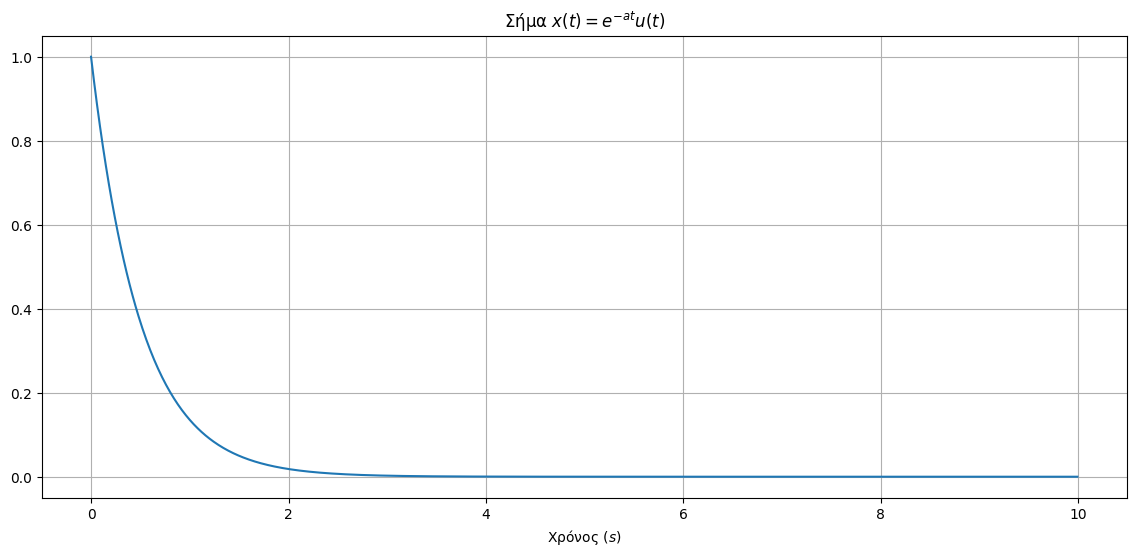

In [20]:
Dt = 0.01                                # Βήμα στο χρόνο
D = 10                                   # Διάρκεια του σ΄ήματος (θεωρητικά είναι άπειρης διάρκειας αλλά... you know :) )
t = np.arange(start=0, stop=D, step=Dt)  # Άξονας του χρόνου, από 0 ως D με βήμα Dt

a = 2                                    # Παράμετρος α
x = np.exp(-a*t)                         # Σήμα
plt.figure(figsize=(14,6))               # Σχήμα (μέγεθος)
plt.plot(t, x)                           # Γράφημα
plt.xlabel("Χρόνος $(s)$")               # Ομορφαίνουμε
plt.title("Σήμα $x(t) = e^{-at}u(t)$")   # Ομορφαίνουμε
plt.grid()                               # Ομορφαίνουμε

Εδώ παραλείψαµε να χρησιμοποιήσουμε ρητά τη βηµατική, αφού ο άξονας του χρόνου που δηµιουργήσαµε πριν έχει θετικές τιµές, οπότε ουσιαστικά την έχουμε "ενσωματώσει" κατά τη δημιουργία του.

Έστω ότι θέλουμε να βρούμε το συχνοτικό περιεχόμενο του σήματος στο διάστηµα $f \in [−10, 10)$ Hz, µε ίδια "ανάλυση" όπως και στο πεδίο του χρόνου, δηλ. $0.01$ Hz. Κατασκευάζουµε τον άξονα των συχνοτήτων ως :

In [21]:
Df = 0.01                                   # Βήμα στη συχνότητα
f = np.arange(start=-10, stop=10, step=Df)  # Άξονας της συχνότητας, από -10 ως 10 Hz με βήμα Df

Θεωρούμε λοιπόν ότι µας ενδιαφέρουν μόνο οι παραπάνω συχνότητες $[−10, 10)$, µε ανάλυση $Df$, και ότι σε αυτό το διάστηµα θα υπολογίσουμε τον μετασχηματισμό Fourier. ΄Αρα, ουσιαστικά, θα βλέπουμε τον μετασχηματισμό Fourier μόνο στο διάστηµα $[−10, 10)$. Γνωρίζοντας τα δείγματα του χρόνου και της συχνότητας μπορούμε να κατασκευάσουµε το λεγόμενο $\textit{πίνακα ανάλυσης}$ του μετασχηματισμού Fourier:

$$\large M(f_n, t_n) = e^{−j2πf_n t_n}$$

με τους δείκτες $n$ να υποδεικνύουν ότι οι μεταβλητές αυτές είναι διακριτές: έχουμε λάβει μόνο κάποια δείγματα από τις συνεχείς μεταβλητές $f, t$, όπως ακριβώς κάναμε μόλις πριν, χρησιμοποιώντας τα βήματα $Dt$, $Df$, για να τμηματοποιήσουμε τους αντίστοιχους άξονες.

Η $\texttt{Python}$ έχει κάποιες ιδιαιτερότητες στις πράξεις με διανύσματα: χρειάζεται να τους προσθέσουμε μια έξτρα διάσταστη, ώστε να τηρούνται οι κανόνες της Γραμμικής Άλγεβρας στις πράξεις μεταξύ διανυσμάτων. Η διάσταση αυτή δεν αλλάζει σε τίποτα τα δεδομένα μας, απλά χρησμοποιείται για το λόγο που αναφέραμε. Δείτε πως:

In [22]:
tt = np.expand_dims(t, axis=0)        # Προσθέτουμε μια έξτρα διάσταση στο χρόνο: από [1000] -> [1,1000]
ff = np.expand_dims(f, axis=0)        # Προσθέτουμε μια έξτρα διάσταση στη συχνότητα: από [2000] -> [1,2000]

M = np.exp(-1j * 2 * np.pi * ff.T @ tt) # M(f_n, t_n): Σύμφωνα με τη γραμμική άλγεβρα: [2000 x 1] * [1 x 1000] = [2000 x 1000]

print(f"Πριν: Διαστάσεις t = {t.shape}, f = {f.shape}, \
      Μετά: Διαστάσεις t = {tt.shape}, f = {ff.shape}")   # Ελέγξτε τις διαστάσεις πριν και μετά την επέκταση

Πριν: Διαστάσεις t = (1000,), f = (2000,),       Μετά: Διαστάσεις t = (1, 1000), f = (1, 2000)


$\textbf{Σημείωση}$: Το $\texttt{.Τ}$ attribute ενός $\texttt{NumPy}$ διανύσματος/πίνακα μας επιστρέφει τον $\textit{ανάστροφό}$ του, και πολλές φορές χρησιμοποιείται για να συμφωνούν οι διαστάσεις των πινάκων που εμπλέκονται ως γινόμενα, ενώ ο τελεστής "@" δηλώνει πολλαπλασιασμό πινάκων/διανυσμάτων, με βάση τους κανόνες της γραμμικής άλγεβρας.

Έχουμε λοιπόν τον πίνακα $M(f_n, t_n)$, μεγέθους $2000$ x $1000$: έχουμε $2000$ δείγματα από τον άξονα συχνότητας και $1000$ δείγματα από τον άξονα του χρόνου, και έχουμε κατασκευάσει τα μιγαδικά εκθετικά μας σήματα $e^{-j2\pi f_n t_n}$.

Για να υπολογίσουµε τον µετασχηματισμό Fourier, θα χρησιμοποιήσουμε το ολοκλήρωµα Riemann, δηλ. θα δηµιουργήσουµε την προσέγγιση του µετασχηματισμού Fourier ως:

$$\large X(f) = \int_{-\infty}^{+\infty}x(t)e^{-j2\pi ft}dt \approx \lim_{\Delta t_i \rightarrow 0} \sum_{i=-\infty}^{+\infty} \left(x\left( \Delta t_i \right) e^{-j2\pi f_n \Delta t_i}\Delta t_i\right) = \Delta t \: \mathbf{x} \mathbf{M}^T$$

και ένας τρόπος να υλοποιηθεί αυτό στην $\texttt{Python}$ είναι:

In [23]:
xx = np.expand_dims(x, axis=0)    # Προσθέτουμε την έξτρα διάσταση στο σήμα x για να ισχύει η γραμμική άλγεβρα

X = Dt * xx @ M.T                 # Ολοκλήρωμα Riemann: [1 x 1000] * [1000 x 2000] = [1 x 2000]

X = np.squeeze(X)                 # "Kόβουμε" την έξτρα διάσταση ώστε να είναι πιο διαχειρίσιμο στα γραφήματα

Ας συγκρίνουμε το φάσμα πλάτους του παραπάνω με το θεωρητικό φάσμα πλάτους που ξέρουμε:

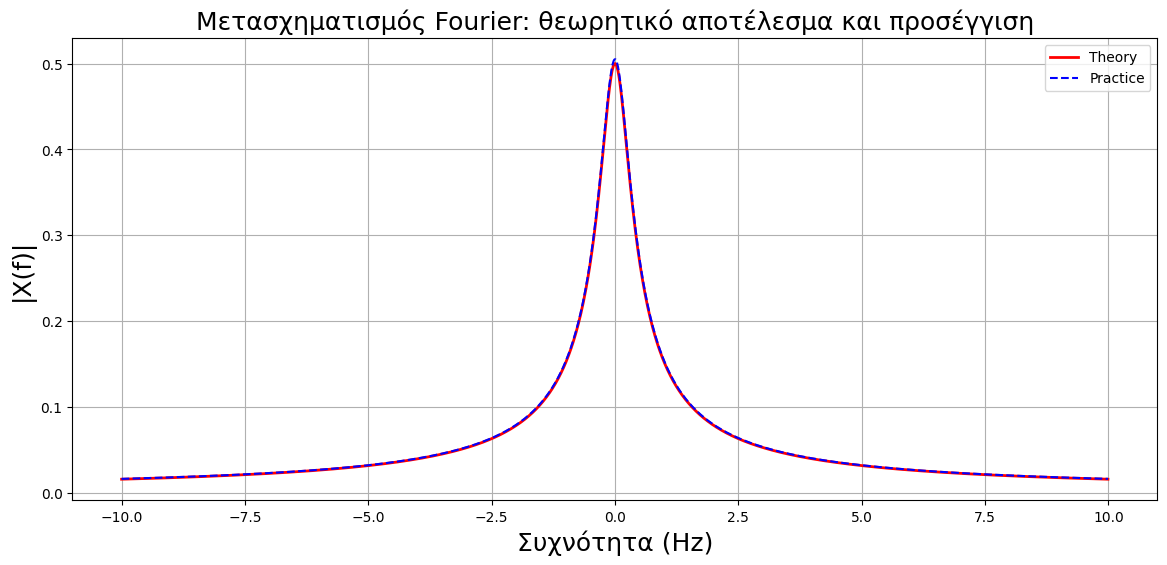

In [24]:
plt.figure(figsize=(14,6))
Xtheoretic = 1 / (a + 1j*2*np.pi*f)  
plt.plot(f, np.abs(Xtheoretic), 'r', linewidth=2, label="Theory")
plt.plot(f, np.abs(X), 'b--', linewidth=1.5, label="Practice")
plt.legend()
plt.title('Μετασχηματισμός Fourier: θεωρητικό αποτέλεσμα και προσέγγιση', fontsize=18)
plt.xlabel("Συχνότητα (Hz)", fontsize=18)
plt.ylabel("|X(f)|", fontsize=18)
plt.grid()

**Εκπληκτικό**!! Η προσέγγισή μας είναι εξαιρετικά καλή, καθώς δεν μπορούμε εύκολα να διακρίνουμε τους δυο μετασχηματισμούς. Ας δούμε απλά πόσο είναι το μέγιστο σφάλμα μεταξύ τους:

In [25]:
Max_error = np.max(np.abs(X-Xtheoretic))
print(f"Το μέγιστο σφάλμα μεταξύ της θεωρίας και της προσέγγισης είναι {Max_error}")

Το μέγιστο σφάλμα μεταξύ της θεωρίας και της προσέγγισης είναι 0.005044610480105688


---
---

$\left(\beta'\right)$ Ας προσπαθήσουµε τώρα να συνθέσουµε το σήµα στο χρόνο µέσω του αντίστροφου µετασχηματισμού Fourier, δηλ. ας προσπαθήσουµε να βρούµε το σήµα στο χρόνο, $x(t)$! Ο µετασχ. Fourier που έχουµε ϐρει ορίζεται µόνο στο διάστηµα $f \in [−10, 10)$ Hz, αρα σίγουρα θα έχουµε κάποιο σφάλµα στον υπολογισµό του $x(t)$.

Γνωριζοντας τα δείγµατα του χρόνου και της συχνότητας µπορούµε να κατασκευάσουµε το λεγόµενο $\textit{πίνακα σύνθεσης}$ του αντίστροφου µετασχ. Fourier:

$$\large M_{inv}(f_n, t_n) = e^{j2πf_n t_n}$$

με τους δείκτες $n$ να υποδεικνύουν ξανά ότι οι μεταβλητές αυτές είναι διακριτές: έχουμε λάβει μόνο κάποια δείγματα από τις συνεχείς μεταβλητές $f, t$.

In [26]:
# Έχουμε ήδη τακτοποι΄ήσει τις επεκτάσεις των αξόνων t -> tt και f -> ff, οπ΄ότε δε χρειάζεται να το επαναλάβουμε

Minv = np.exp(1j * 2 * np.pi * tt.T @ ff) # M_inv(f_n, t_n): Σύμφωνα με τη γραμμική άλγεβρα: 
                                          # [1000 x 1] * [1 x 2000] = [1000 x 2000]

Τώρα έχουμε τον πίνακα $M_{inv}(f_n, t_n)$, μεγέθους $1000$ x $2000$: έχουμε $1000$ δείγματα από τον άξονα του χρόνου και $2000$ δείγματα από τον άξονα συχνότητας (όπως και πριν), και έχουμε κατασκευάσει τα μιγαδικά εκθετικά μας σήματα $e^{j2\pi f_n t_n}$.

Για να υπολογίσουμε τον αντίστροφο μετασχηματισμό Fourier, θα δουλέψουμε όπως για το ολοκλήρωµα Riemann προηγουμένως, µε κάποιες μικρές διαφοροποιήσεις, δηλ. θα δημιουργήσουμε την προσέγγιση του αντίστροφου μετασχηματισμού Fourier ως:

$$\large x(t) = \int_{-\infty}^{+\infty} X(f)e^{j2\pi ft}df \approx \lim_{\Delta f_i \rightarrow 0} \sum_{i=-\infty}^{+\infty} \left(X\left( \Delta f_i \right) e^{j2\pi t_n \Delta f_i}\right) = \Delta f \: \mathbf{X} \mathbf{M_{inv}}^T$$


Η σύνθεση του σήματος στο χρόνο γίνεται ως:

In [27]:
XX = np.expand_dims(X, axis=0)                            # Επαναφέρουμε την έξτρα διάσταση που "κόψαμε" πριν 
                                                          # για λόγους απεικόνισης

x_est = Df * XX @ Minv.T                                  # [1 x 2000] * [2000 x 1000] = [1 x 1000]

x_est = x_est.real                                        # Λόγω αριθμητικών σφαλμάτων, θα υπάρχει ένα μικρό φανταστικό 
                                                          # μέρος στο αποτέλεσμα, το οποίο και απορρίπτουμε κρατώντας το
                                                          # πραγματικό μέρος μόνο

x_est = np.squeeze(x_est)                                 # "Κόβουμε" την έξτρα διάσταση όπως πριν για καλύτερη διαχείριση
                                                          # στα γραφήματα

Ας συγκρίνουμε το αποτέλεσμά µας µε το θεωρητικό:

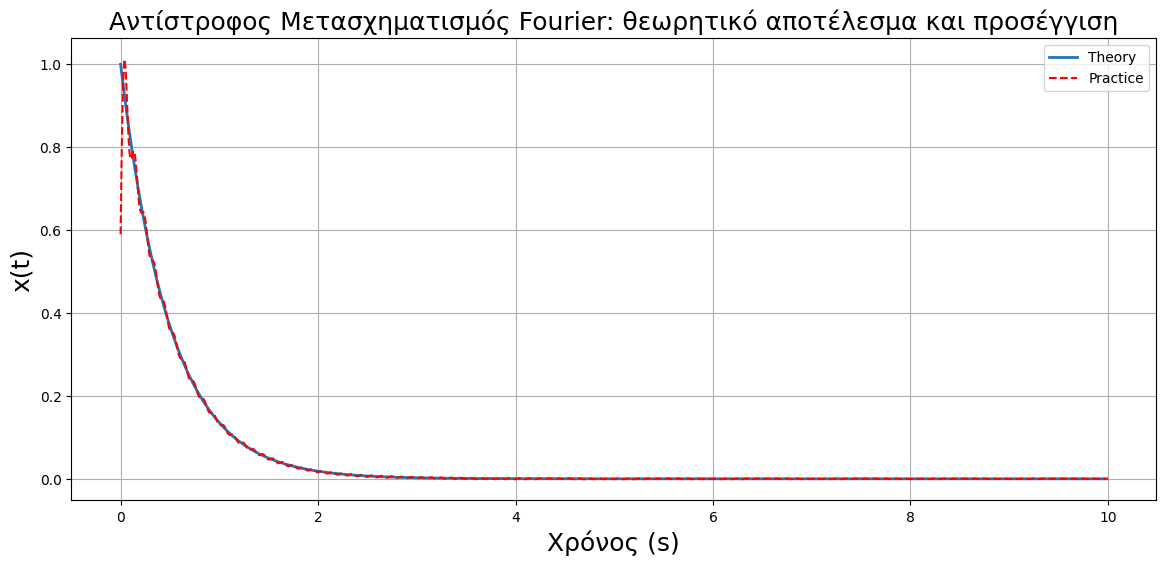

In [28]:
plt.figure(figsize=(14,6))
plt.plot(t, x, linewidth=2, label="Theory")
plt.plot(t, x_est, 'r--', linewidth=1.5, label="Practice")
plt.title('Αντίστροφος Μετασχηματισμός Fourier: θεωρητικό αποτέλεσμα και προσέγγιση', fontsize=18)
plt.xlabel("Χρόνος (s)", fontsize=18)
plt.ylabel("x(t)", fontsize=18)
plt.legend()
plt.grid()

Εδώ η διαφορά είναι πιο εμφανής! Ας υπολογίσουμε κι εδώ το μέγιστο σφάλμα μεταξύ των δυο συναρτήσεων:

In [29]:
Max_error = np.max(np.abs(x-x_est))
print(f"Το μέγιστο σφάλμα μεταξύ της θεωρίας και της προσέγγισης είναι {Max_error}")

Το μέγιστο σφάλμα μεταξύ της θεωρίας και της προσέγγισης είναι 0.4097931550274103


---
---
## Άσκηση:

Γράψτε κατάλληλο κώδικα για να βρείτε και τυπώσετε τα παρακάτω σήματα:

### i. $x_1(t) = -e^{3t}u(-t)$
### ii. $x_2(t) = 4\mathrm{rect}(t+1)$
### iii. $x_3(t) = 2\mathrm{tri}(t-2)$
### iv. $x_4(t) = e^{-|t|}$

υλοποιώντας τα πρώτα στο πεδίο του χρόνου, βρίσκοντας το μετασχ. Fourier τους, και χρησιμοποιώντας τον για να ξανασυνθέσετε το σήμα στο χρόνο (ακριβώς όπως στο παραπάνω παράδειγμα). Σας δίνεται βοηθητικός κώδικας παρακάτω.

### Σημείωση - Βοηθητικές συναρτήσεις: 

Στην βιβλιοθήκη $\texttt{SciPy}$ παρέχονται υλοποιήσεις για τον τετραγωνικό και τριγωνικό παλμό (στο $\texttt{signal}$ υποπακέτο), αλλά μπορεί να σας φανούν λίγο περίεργες ως προς την χρήση τους. 

Προς ευκολία, σας δίνονται εναλλακτικές, απλούστερες υλοποιήσεις του τετραγωνικού και τριγωνικού παλμού παρακάτω. Απλά εκτελέστε τα παρακάτω κελιά.

In [30]:
def rect(time_axis, dt, A=1, T=1, t_0=0):
    """
    Παράμετροι:
    ----------
    time_axis: ndarray
        άξονας του χρόνου (χωρίς έξτρα διάσταση)
    dt: ndarray
        βήμα στο χρόνο 
    A: float
        πλάτος του τετραγωνικού παλμού 
    T: float
        διάρκεια ολόκληρου παλμού 
    t_0: float
        μετατόπιση: (καθυστέρηση για t_0>0, προήγηση για t_0<0)
    Επιστρέφει:
    -------
    ndarray
        rect(t/T) = {A, t στο (-T/2, T/2)
                    {0, αλλού.
    """
    xx = np.zeros(shape=time_axis.shape)
    origin = int(len(time_axis)/2 + t_0/dt)
    range1 = origin - int(T/dt)//2
    range2 = origin + int(T/dt)//2
    xx[range1:range2] = A
    
    return xx


def tri(time_axis, dt, A=1, T=1, t_0=0):
    """
    Παράμετροι:
    ----------
    time_axis: ndarray
        άξονας του χρόνου (χωρίς έξτρα διάσταση)
    dt: ndarray
        βήμα στο χρόνο 
    A: float
        πλάτος του τριγωνικού παλμού 
    T: float
        διάρκεια ΜΙΣΟΥ παλμού 
    t_0: float
        μετατόπιση: (καθυστέρηση για t_0>0, προήγηση για t_0<0)
    Επιστρέφει:
    -------
    ndarray
        Atri(t/T) = {A(1-|t|/T), t στο (-T, T)
                    {0, αλλού.
    """
    xx = np.zeros(shape=time_axis.shape)
    origin = int(len(time_axis)/2+t_0/dt)
    range1 = origin - int(T/dt)
    range2 = origin + int(T/dt)
    xx[range1:origin] = np.linspace(start=0, stop=A, num=origin-range1)
    xx[origin:range2] = np.linspace(start=A, stop=0, num=range2-origin)
    
    return xx

Επίσης, σας δίνονται ως συναρτήσεις οι παρακάτω δυο:
- $\texttt{ctft_ictft}$: υπολογίζει το σήμα στο χρόνο μέσω του αντίστροφου μετασχ. Fourier, εκτελώντας τα βήματα που είδατε πριν
- $\texttt{plotter}$: τυπώνει τη σύγκριση μεταξύ δυο σημάτων στο χρόνο: του αυθεντικού και της προσέγγισης μέσω αντιστρ. μετασχ. Fourier

Απλά εκτελέστε τα παρακάτω κελιά.

In [31]:
def ctft_ictft(freq, df, time, dt, xx):
    """
    Παράμετροι:
    ----------
    freq: ndarray
        άξονας της συχνότητας (χωρίς την έξτρα διάσταση)
    df: ndarray
        βήμα στη συχνότητα
    time: ndarray
        άξονας του χρόνου (χωρίς την έξτρα διάσταση)
    dt: ndarray
        βήμα στο χρόνο
    xx: ndarray
        σήμα στο χρόνο
    Επιστρέφει:
    -------
    x_inv: ndarray
        το σήμα στο χρόνο υπολογισμένο μέσω του μετασχηματισμού Fourier, ως αποτέλεσμα της ακολουθίας πράξεων: 
        
                                              xx(t) -> X(f) -> x_inv(t)
    """
    ff = np.expand_dims(freq, axis=0)                 # Βάζουμε την έξτρα διάσταση
    tt = np.expand_dims(time, axis=0)                 # ---------- "" ------------
    
    M = np.exp(-1j*2*np.pi*ff.T@tt)                   # [N x 1] * [1 x L] = [N x L]
    X_f = dt * xx @ M.T                               # [1 x L] * [L x N] = [1 x N]
    
    M_inv = np.exp(1j*2*np.pi*tt.T@ff)                # [L x 1] * [1 x N] = [L x N]
    x_inv = df * X_f @ M_inv.T                        # [1 x N] * [N x L] = [1 x L]
    
    x_inv = np.squeeze(x_inv)                         # Βγάζουμε την έξτρα διάσταση που μπήκε για να γίνουν οι πράξεις
    
    return x_inv



def plotter(time, signal, signal_est, title):
    """
    Παράμετροι:
    ----------
    time: ndarray
        άξονας του χρόνου (χωρίς την έξτρα διάσταση)
    signal: ndarray
        σήμα στο χρόνο (original) (χωρίς την έξτρα διάσταση)
    signal_est: ndarray
        σήμα στο χρόνο (προσέγγιση μέσω μετασχ. Fourier) (χωρίς την έξτρα διάσταση)
    title: string
        τίτλος γραφήματος
    Επιστρέφει:
    -------
    Γράφημα
    """
    
    plt.figure(figsize=(14,6))
    plt.plot(time, signal, linewidth=2, label="Theory")
    plt.plot(time, signal_est, 'r', linewidth=2, label="Practice")
    plt.title(title, fontsize=18)
    plt.xlabel("Χρόνος (s)", fontsize=18)
    plt.ylabel("Πλάτος", fontsize=18)
    plt.legend()
    plt.grid()
    
    return

# Απαντήσεις:

Συμπληρώστε τον παρακάτω κώδικα:

In [32]:
# Χρησιμοποιήστε τις ακόλουθες μεταβλητές/διανύσματα για όλες τις απαντήσεις σας παρακάτω:
df = 0.01
f = np.arange(start=-10, stop=10, step=df)

dt = 0.01
# Ο άξονας του χρόνου t σας δίνεται για το κάθε παράδειγμα


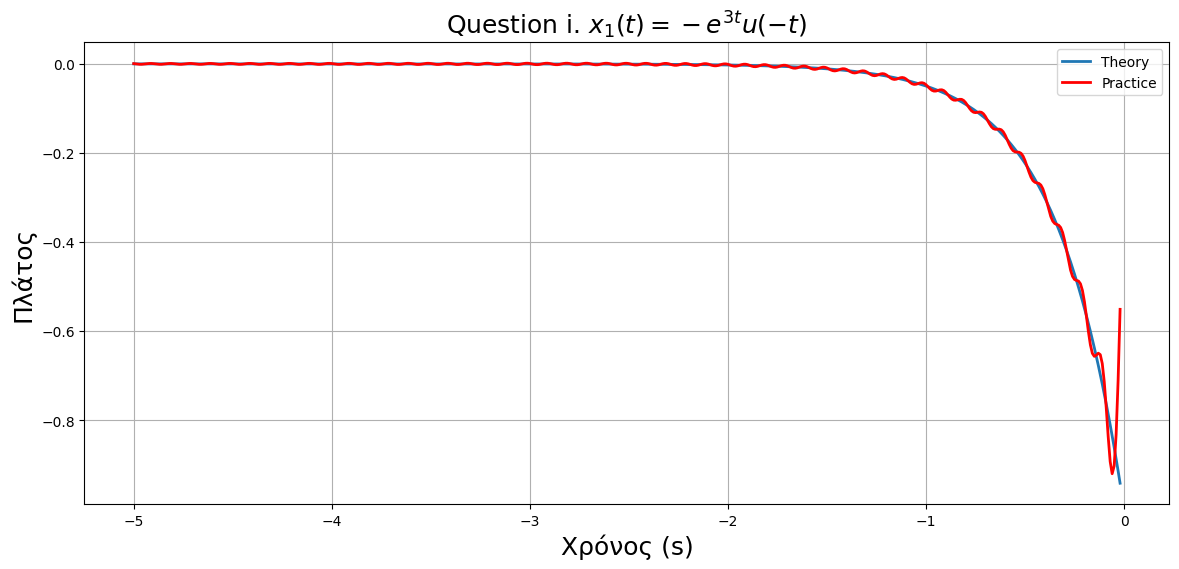

In [33]:
#  i)
t = np.arange(start=-5, stop=-dt, step=dt)
x1 = (-np.exp(3 * t) )
x1_est = ctft_ictft(f, df, t, dt, x1)
plotter(time=t, signal=x1, signal_est=x1_est.real, title="Question i. $x_1(t)=-e^{3t}u(-t)$")

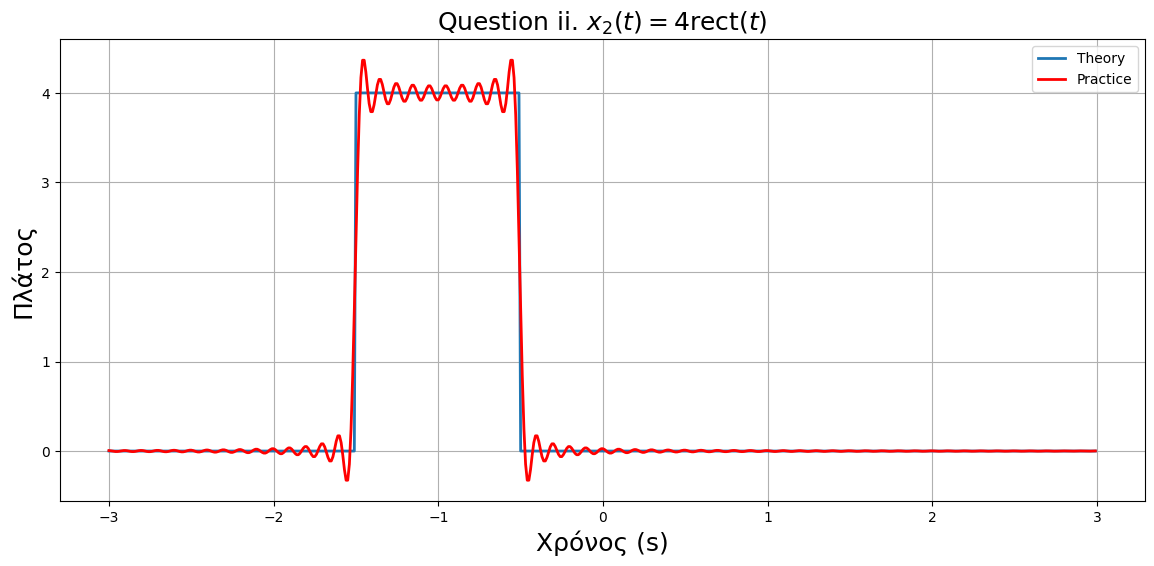

In [34]:
# ii)
#4rect(t+1)
t = np.arange(start=-3, stop=3, step=dt)
x2 = rect(t, dt, 4, 1, -1)

x2_est = ctft_ictft(f, df, t, dt, x2)

plotter(time=t, signal=x2, signal_est=x2_est.real, title="Question ii. $x_2(t)=4\mathrm{rect}(t)$")

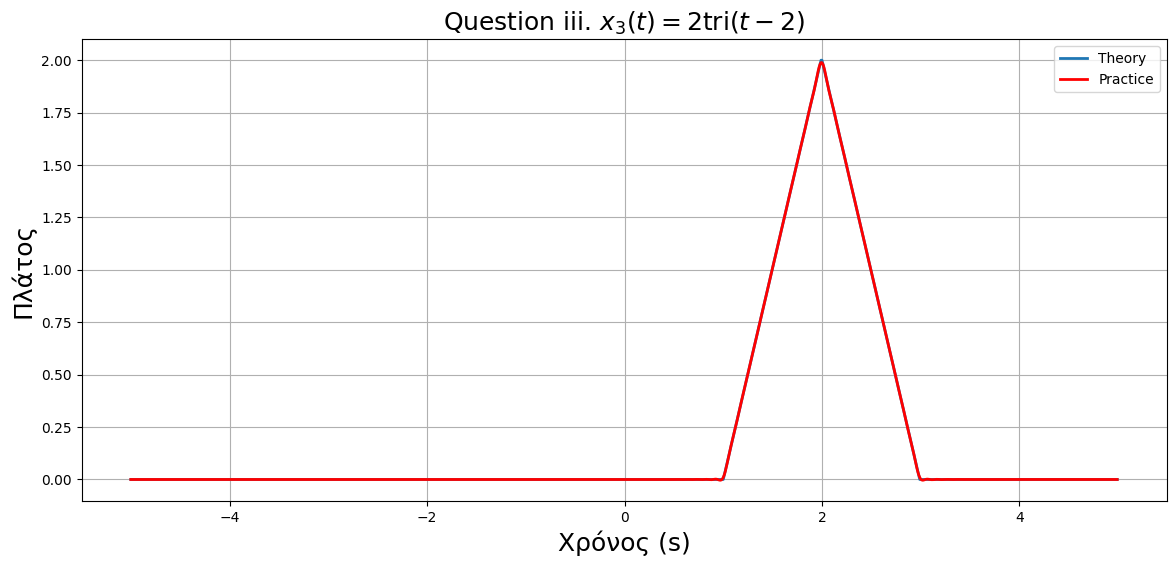

In [35]:
# iii)
#2tri(t−2)
t = np.arange(start=-5, stop=5, step=dt)
x3 = tri(t, dt, 2, 1, 2)  #αρχικα ειχα 1/2 στο μηκος παλμου αφου η συναρτηση ζηταει το μισο Τ. Αλλα φαινεται να τεριαζει καλυερα το Τ=1 με την φωτ που δωθηκε
x3_est = ctft_ictft(f, df, t, dt, x3)
plotter(time=t, signal=x3, signal_est=x3_est.real, title="Question iii. $x_3(t)=2\mathrm{tri}(t-2)$")

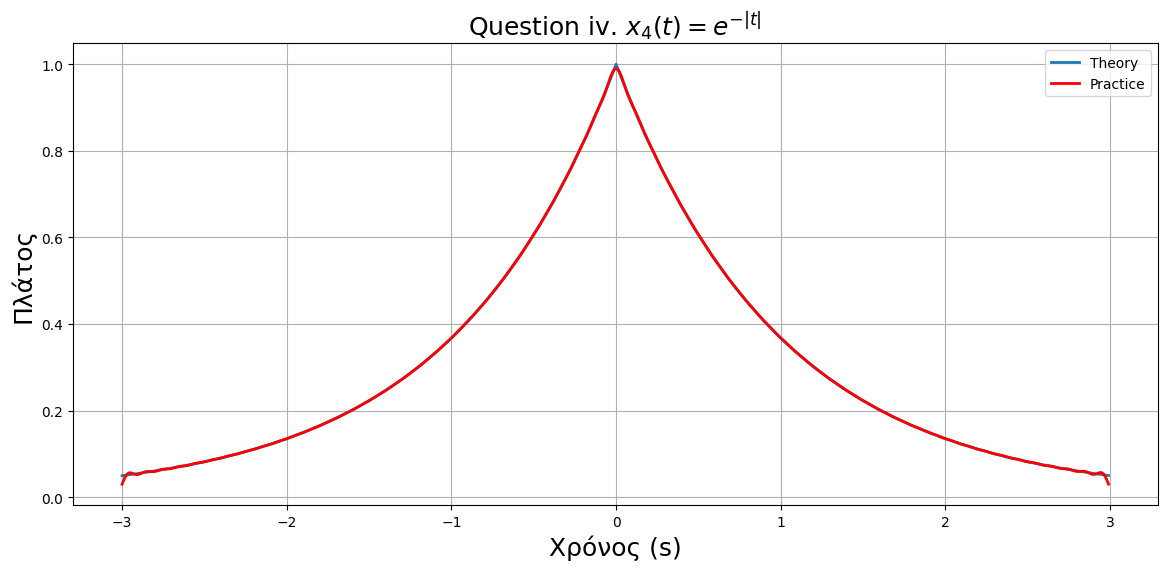

In [36]:
# iv)
#e−|t|
t = np.arange(start=-3, stop=3, step=dt)
x4 = np.exp(-np.abs(t))
x4_est = ctft_ictft(f, df, t, dt, x4)
plotter(time=t, signal=x4, signal_est=x4_est.real, title="Question iv. $x_4(t)=e^{-|t|}$")

Αν τα κανετε όλα σωστά, θα πάρετε τα παρακάτω σχήματα:

![hw1out.png](attachment:hw1out.png)

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.